In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Comma Data Updated Headers.csv')

In [3]:
df.head()

,RespondentID,Sentence,OxfordCommaHeard,OxfordCommaCare,Unnamed: 4,DataPlural,DataPluralCare,GrammarImportance,Gender,Age,Income,Education,Location
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna(subset = ['Gender', 'Age'])
series = df.groupby(["Gender", "Age"]).transform(lambda x: x.fillna(x.value_counts().index[0]))

In [5]:
type(series)

pandas.core.frame.DataFrame

In [6]:
df2 = df.dropna()
df3 = pd.get_dummies(series, drop_first= True)

In [7]:
#rename column names
df3 = df3.rename(index = str, columns ={"Sentence_It's important for a person to be honest, kind, and loyal.": "Oxford Comma Use", 
                                        "OxfordCommaHeard_Yes":"Heard of Oxford Comma",
                                        "OxfordCommaCare_Not at all" : "Oxford Care - Not at all", 
                                        "OxfordCommaCare_Not much" : "Oxford Care - Not much",
                                        "OxfordCommaCare_Some" : "Oxford Care - Some",
                                        "Unnamed: 4_Some experts say it's important to drink milk, but the data is inconclusive." : "Data Use",
                                        "DataPlural_Yes": "Data is Plural",
                                        "DataPluralCare_Not at all": "Data Plural Care - Not at all",
                                        "DataPluralCare_Not much" : "Data Plural Care - Not much",
                                        "DataPluralCare_Some" : "Data Plural Care - Some",
                                        "GrammarImportance_Somewhat important": "Grammar - Somewhat Important",
                                        "GrammarImportance_Somewhat unimportant": "Grammar - Somewhat Unimportant",
                                        "GrammarImportance_Very important": "Grammar - Very Important",
                                        "GrammarImportance_Very unimportant": "Grammar - Very Unimportant",
                                        "Education_Graduate degree": "Graduate Degree",
                                        "Education_High school degree" : "High School Degree", 
                                        "Education_Less than high school degree" : "Less than HS Degree",
                                        "Education_Some college or Associate degree": "Some college/Associate Degree"})
df3.head(1)

,RespondentID,Oxford Comma Use,Heard of Oxford Comma,Oxford Care - Not at all,Oxford Care - Not much,Oxford Care - Some,Data Use,Data is Plural,Data Plural Care - Not at all,Data Plural Care - Not much,...,Less than HS Degree,Some college/Associate Degree,Location_East South Central,Location_Middle Atlantic,Location_Mountain,Location_New England,Location_Pacific,Location_South Atlantic,Location_West North Central,Location_West South Central
0,3292953864,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df3.to_csv('clean_data.csv')
y = df3["Oxford Comma Use"]
x = df3.drop(["Oxford Comma Use", "RespondentID"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42, stratify=y)

In [17]:
comma = df2.replace("It's important for a person to be honest, kind, and loyal.", 'Used').replace("It's important for a person to be honest, kind and loyal.", 'Not Used').replace("Some experts say it's important to drink milk, but the data is inconclusive.","Singular Used").replace("Some experts say it's important to drink milk, but the data are inconclusive.", "Plural Used")
comma = comma.rename(index = str, columns = {"Unnamed: 4": "DataPluralUsage"})
comma.head()

,RespondentID,Sentence,OxfordCommaHeard,OxfordCommaCare,DataPluralUsage,DataPlural,DataPluralCare,GrammarImportance,Gender,Age,Income,Education,Location
0,3292953864,Not Used,Yes,Some,Singular Used,No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,Used,No,Not much,Singular Used,No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
5,3292926586,Used,No,A lot,Plural Used,Yes,Some,Very important,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,New England
6,3292908135,Used,Yes,A lot,Singular Used,Yes,Some,Very important,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
7,3292869879,Used,Yes,A lot,Plural Used,No,A lot,Very important,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,East North Central


In [21]:
#explore data
comma.describe(include=['O'])

,Sentence,OxfordCommaHeard,OxfordCommaCare,DataPluralUsage,DataPlural,DataPluralCare,GrammarImportance,Gender,Age,Income,Education,Location
count,825,825,825,825,825,825,825,825,825,825,825,825
unique,2,2,4,2,2,4,5,2,4,5,5,9
top,Used,Yes,Some,Singular Used,Yes,Not much,Very important,Female,45-60,"$50,000 - $99,999",Bachelor degree,Pacific
freq,470,497,311,661,419,321,531,436,248,286,279,151


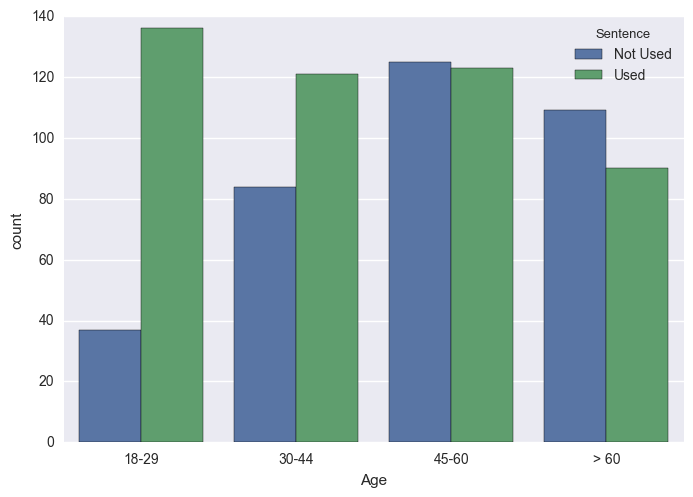

In [20]:
sns.countplot(x="Age", data=comma, hue = 'Sentence', order = ['18-29', '30-44', '45-60', '> 60']);

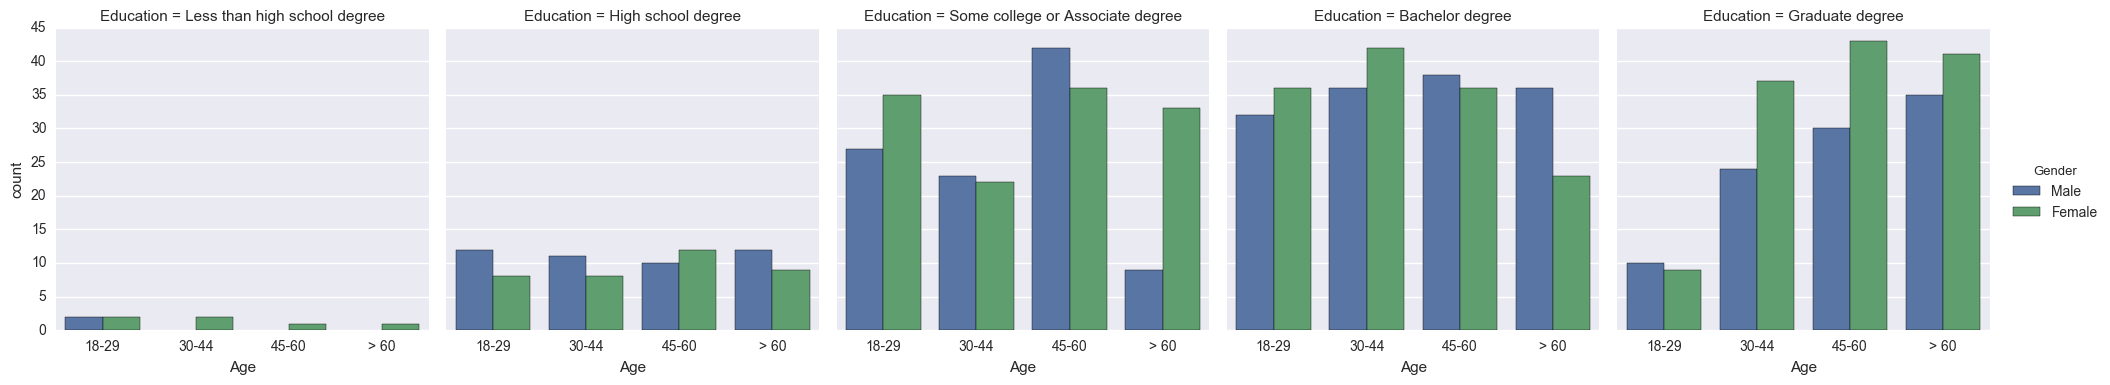

In [19]:
sns.factorplot(x="Age", col="Education", hue = 'Gender', data=comma,
               kind="count", size=4, aspect=1, ci=None, col_wrap = 5, legend_out =True,
               #col_order = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+'],
               col_order = ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 'Bachelor degree', 'Graduate degree'],
               order = ['18-29', '30-44', '45-60', '> 60'],
               #hue_order = ['Very unimportant', 'Somewhat unimportant', 'Neither important nor unimportant (neutral)', 'Somewhat important', 'Very important']
              )

In [42]:
def comparison_graph_comma(x, y, hue, wrap):
    Age_order = ['18-29', '30-44', '45-60', '> 60']
    Income_order = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+']
    Education_order = ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 'Bachelor degree', 'Graduate degree']
    Importance_order = ['Very unimportant', 'Somewhat unimportant', 'Neither important nor unimportant (neutral)', 'Somewhat important', 'Very important']
    Gender_order = ['Male', 'Female']
    Sentence_order = ['Used', 'Not Used']
    Location_order = ['East North Central', 'East South Central', 'Middle Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central']
    Heard_order = ['Yes', 'No']
    Care_order = ['Not at all', 'Not much', 'Some', 'A lot']
    Plural_order = ['Singular Used', 'Plural Used']
    
    
    if x == 'Age':
        x_order = Age_order
    if x == 'Income':
        x_order = Income_order
    if x == 'Education':
        x_order = Education_order
    if x == 'GrammarImportance':
        x_order = Importance_order
    if x == 'Gender':
        x_order = Gender_order
    if x == 'Sentence':
        x_order = Sentence_order
    if x == 'Location':
        x_order = Location_order
    if x == 'OxfordCommaHeard' or x == 'DataPlural':
        x_order = Heard_order
    if x =='OxfordCommaCare' or x == 'DataPluralCare':
        x_order = Care_order
    if x =='DataPluralUsage':
        x_order = Plural_order
        
    if y == 'Age':
        y_order = Age_order
    if y == 'Income':
        y_order = Income_order
    if y == 'Education':
        y_order = Education_order
    if y == 'GrammarImportance':
        y_order = Importance_order
    if y == 'Gender':
        y_order = Gender_order
    if y == 'Sentence':
        y_order = Sentence_order
    if y == 'Location':
        y_order = Location_order
    if y == 'OxfordCommaHeard' or y == 'DataPlural':
        y_order = Heard_order
    if y =='OxfordCommaCare' or y == 'DataPluralCare':
        y_order = Care_order
    if y =='DataPluralUsage':
        y_order = Plural_order
        
    if hue == 'Age':
        hue_ordered = Age_order
    if hue == 'Income':
        hue_ordered = Income_order
    if hue == 'Education':
        hue_ordered = Education_order
    if hue == 'GrammarImportance':
        hue_ordered = Importance_order
    if hue == 'Gender':
        hue_ordered = Gender_order
    if hue == 'Sentence':
        hue_ordered = Sentence_order
    if hue == 'Location':
        hue_ordered = Location_order
    if hue == 'OxfordCommaHeard' or hue == 'DataPlural':
        hue_ordered = Heard_order
    if hue =='OxfordCommaCare' or hue == 'DataPluralCare':
        hue_ordered = Care_order
    if hue =='DataPluralUsage':
        hue_ordered = Plural_order
    if hue == None:
        hue_ordered = None
    
    sns.factorplot(x=x, col=y, hue = hue, data=comma,
               kind="count", size=4, aspect=1, ci=None, col_wrap = wrap, legend_out =True,
               col_order = y_order, order = x_order, hue_order = hue_ordered)



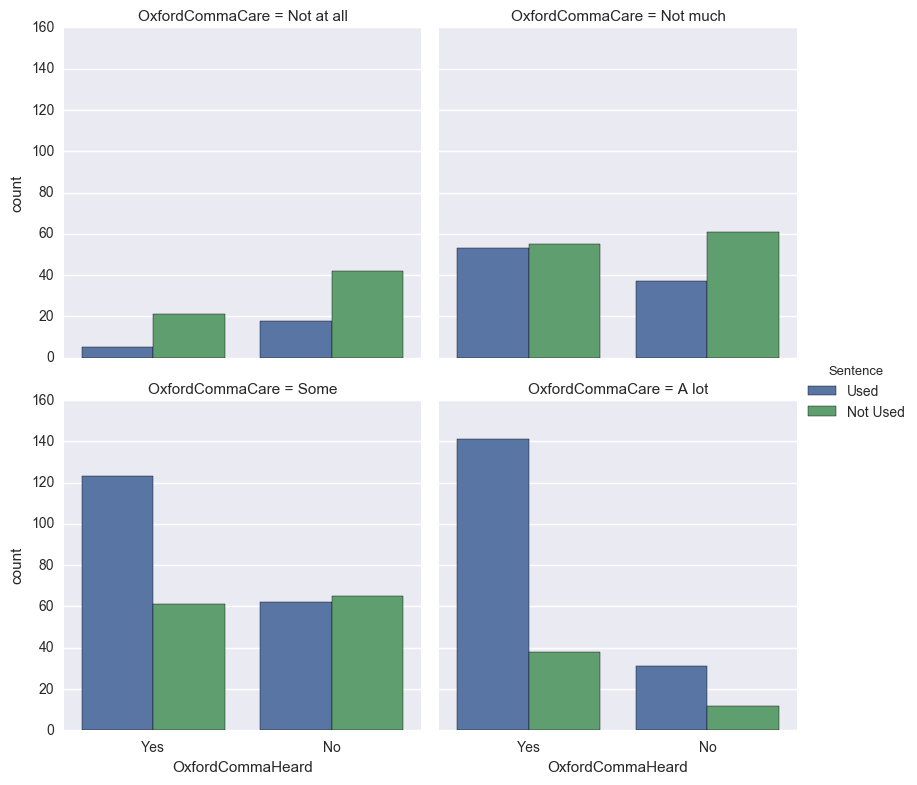

In [24]:
#do the people who used an Oxford Comma care about it and/or have the heard about it?
comparison_graph_comma('OxfordCommaHeard', 'OxfordCommaCare', 'Sentence', 2)

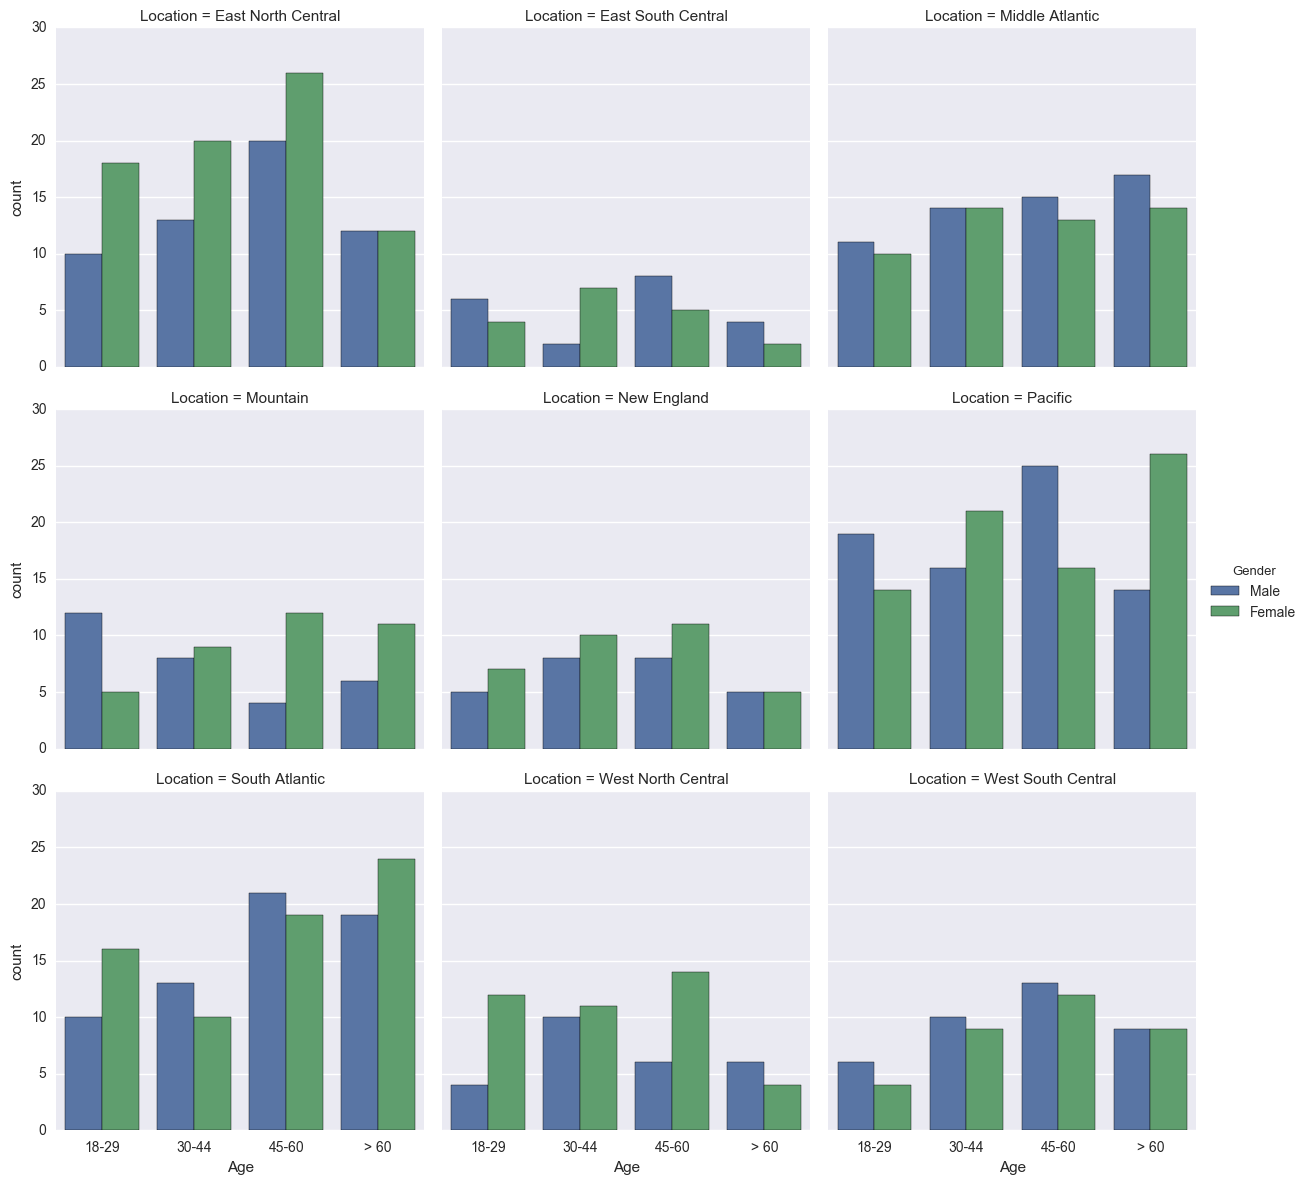

In [25]:
#who responded to the survey - age, location, gender
comparison_graph_comma('Age', 'Location', 'Gender', 3)

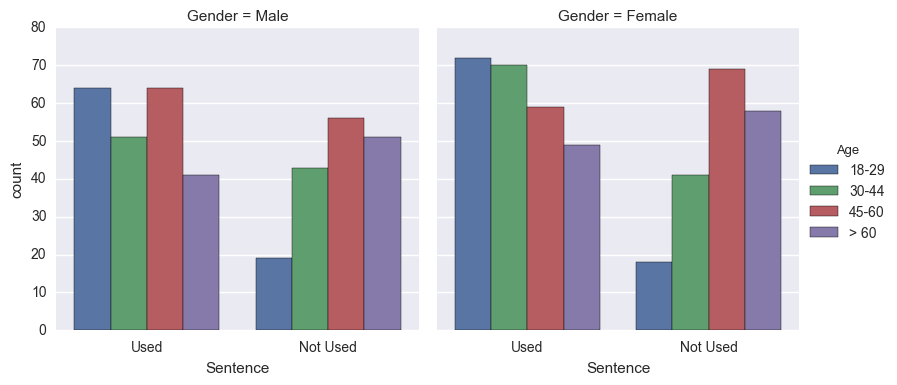

In [28]:
#who used the Oxford Comma more across age groups, male or female?
comparison_graph_comma('Sentence', 'Gender', 'Age', 2)

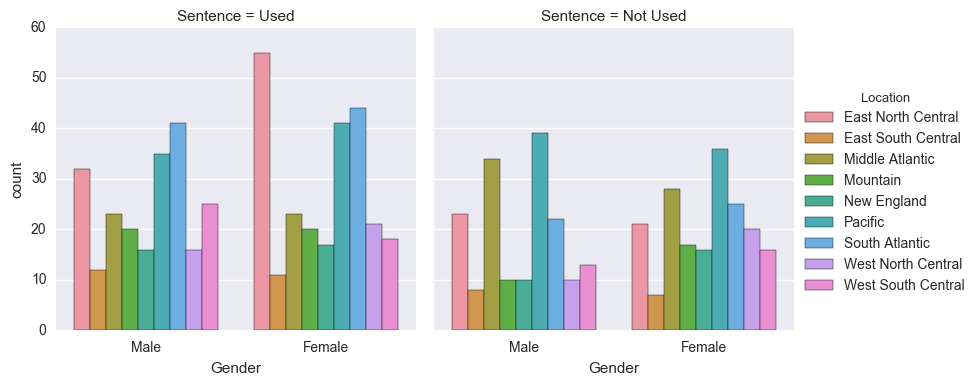

In [31]:
#who uses the Oxford Comma more across Locations?
comparison_graph_comma('Gender', 'Sentence', 'Location', 2)

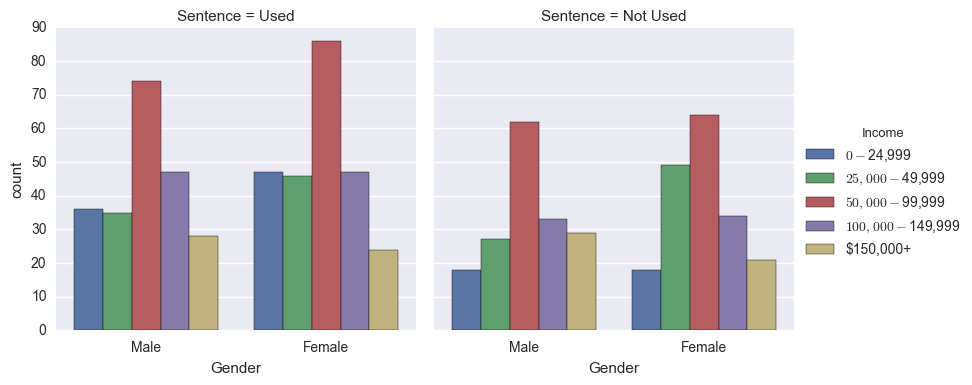

In [32]:
#Does income matter?
comparison_graph_comma('Gender', 'Sentence', 'Income', 2)

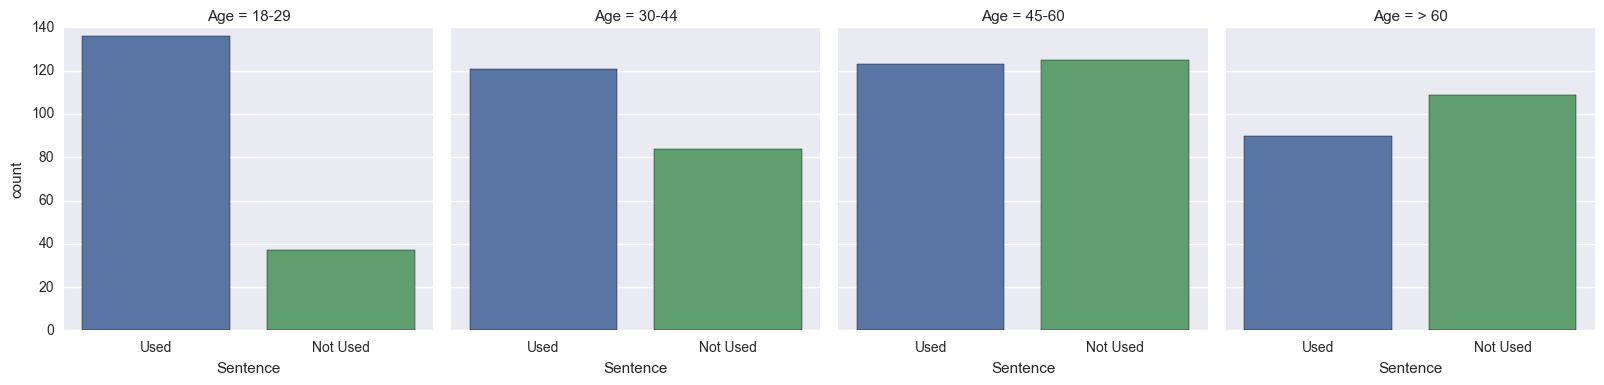

In [41]:
comparison_graph_comma('Sentence', 'Age', None, 4)

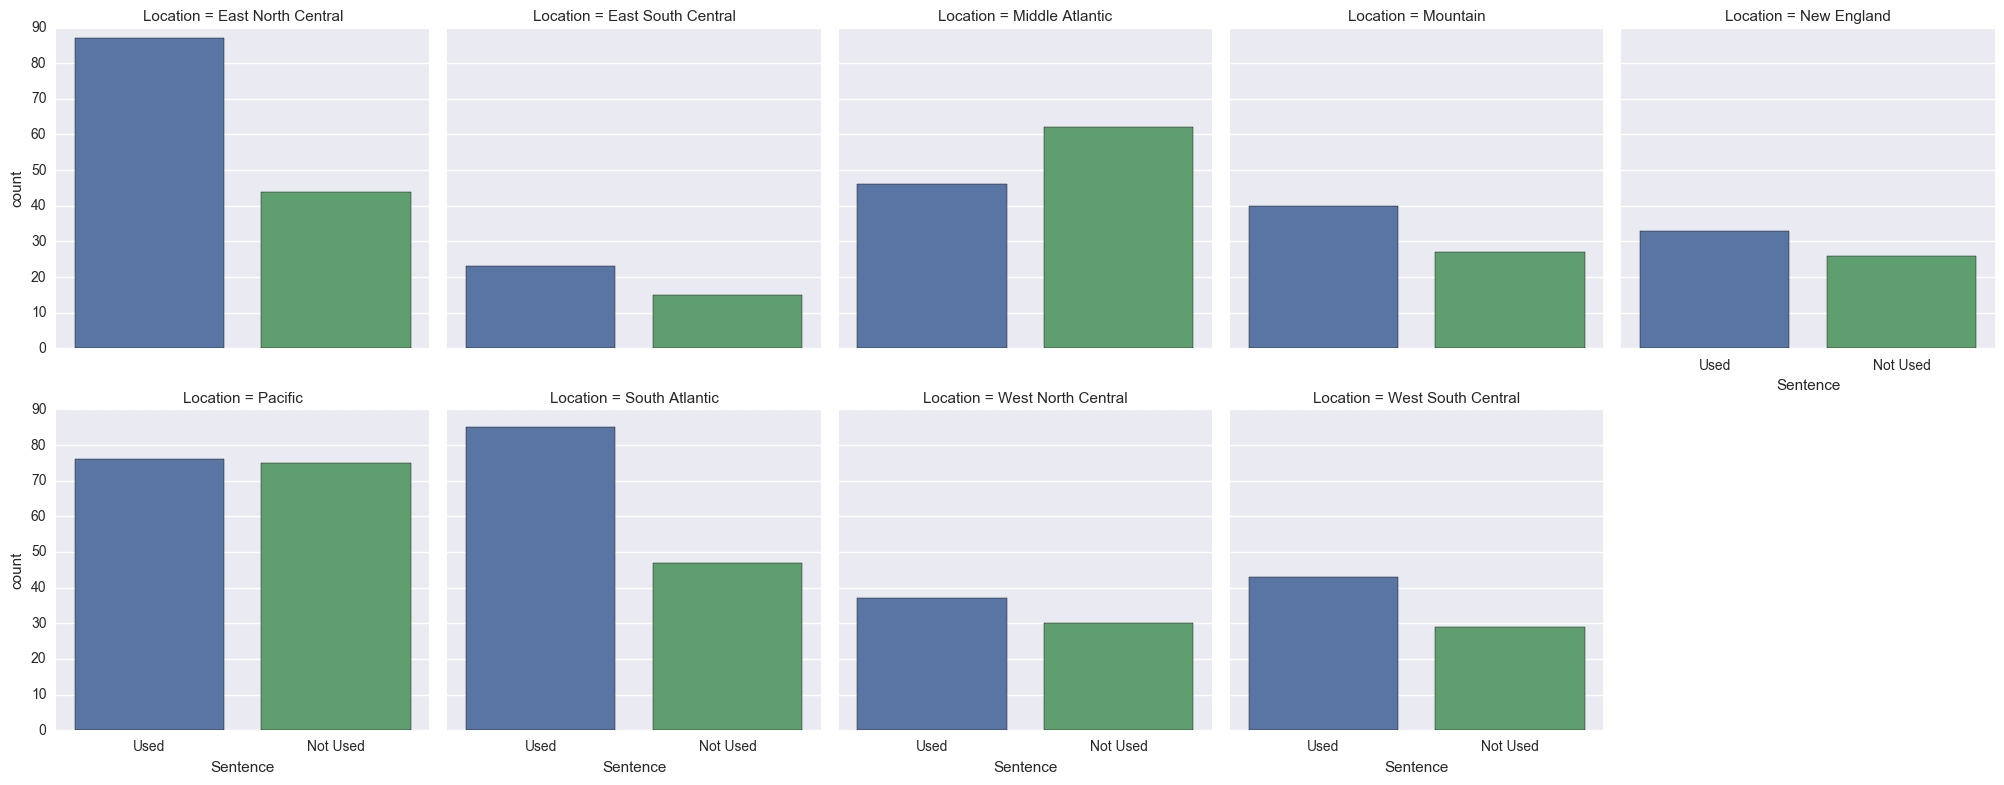

In [44]:
comparison_graph_comma('Sentence', 'Location', None, 5)

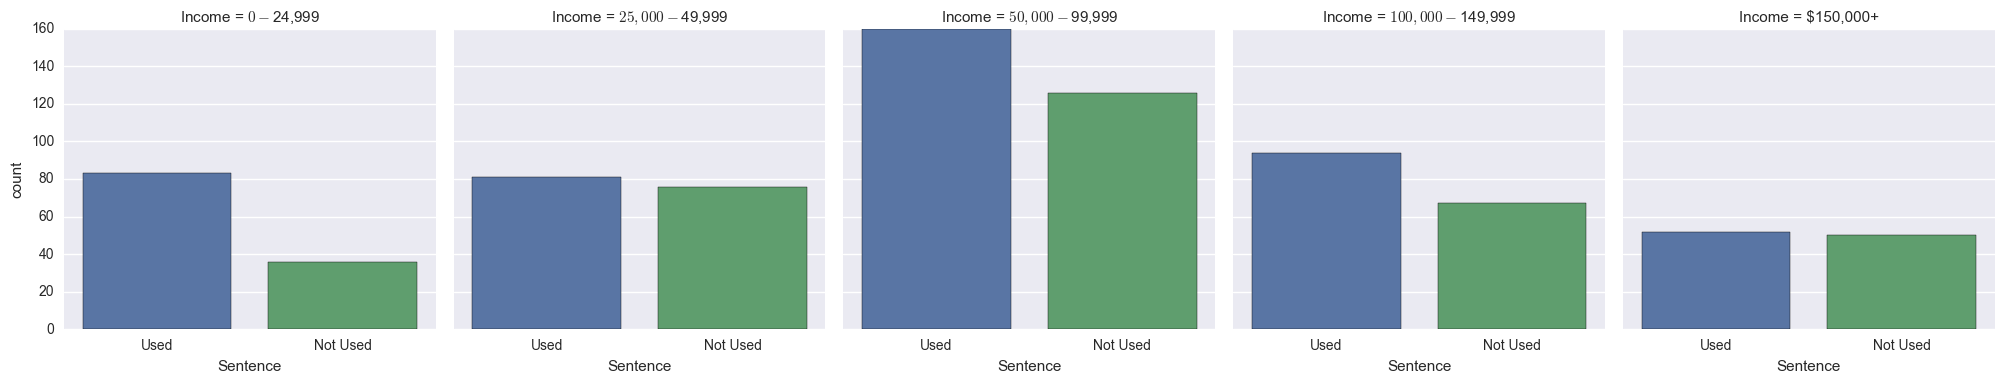

In [45]:
comparison_graph_comma('Sentence', 'Income', None, 5)

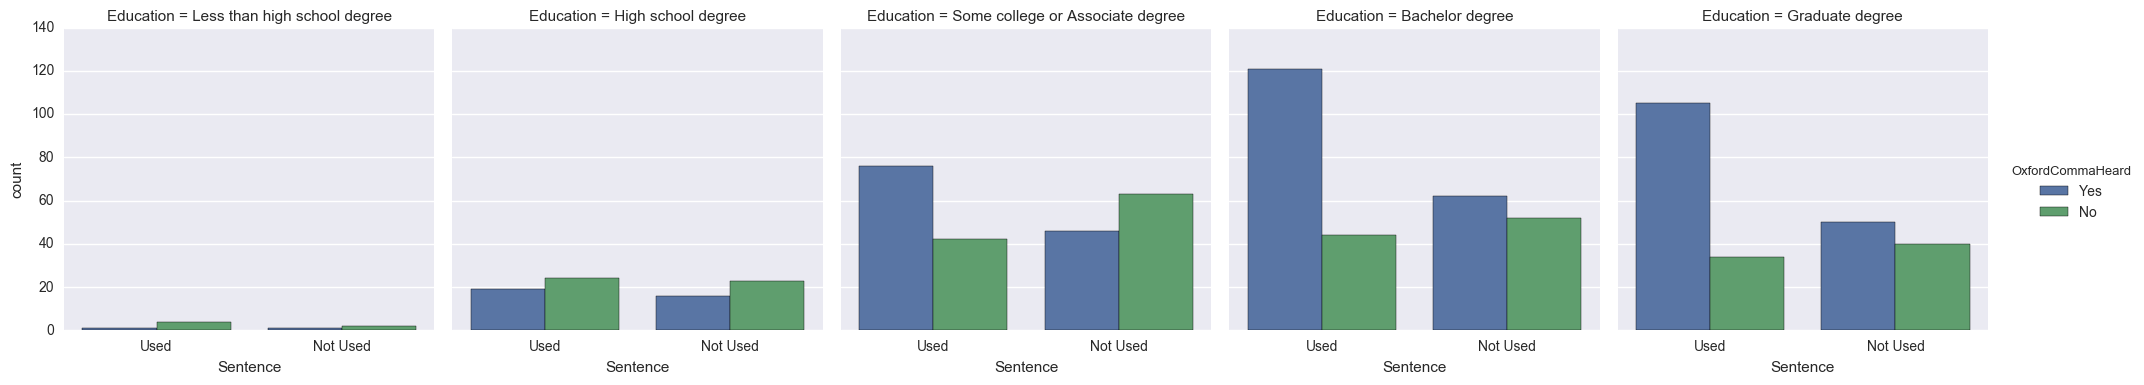

In [49]:
comparison_graph_comma('Sentence', 'Education', 'OxfordCommaHeard', 5)

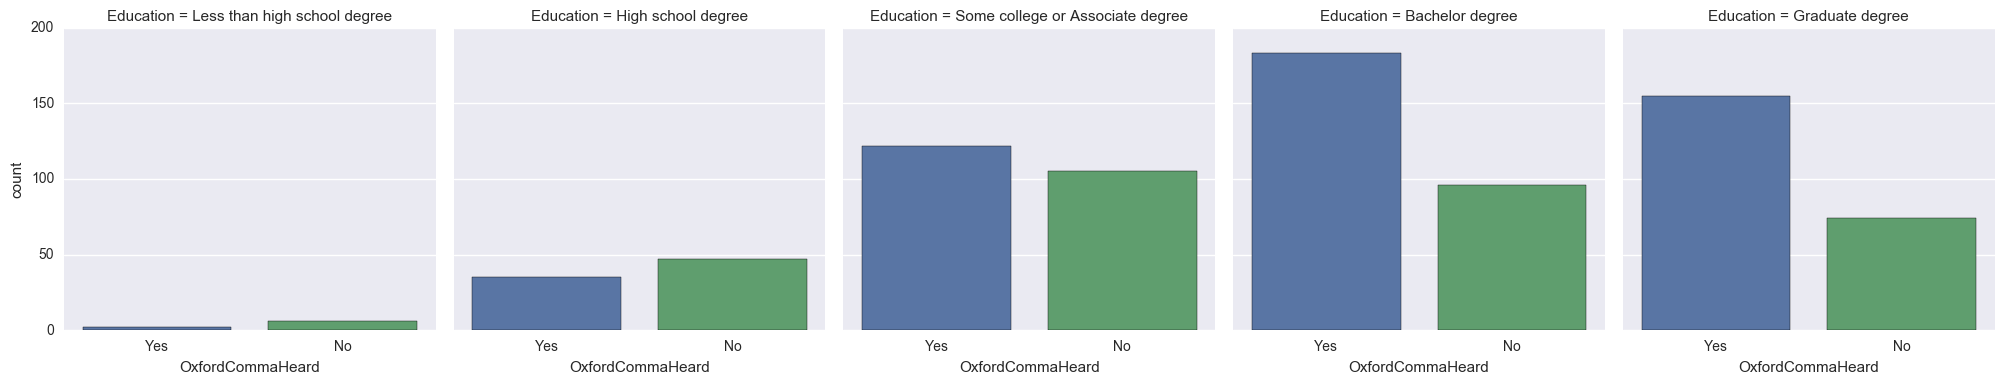

In [50]:
comparison_graph_comma( 'OxfordCommaHeard', 'Education', None, 5)

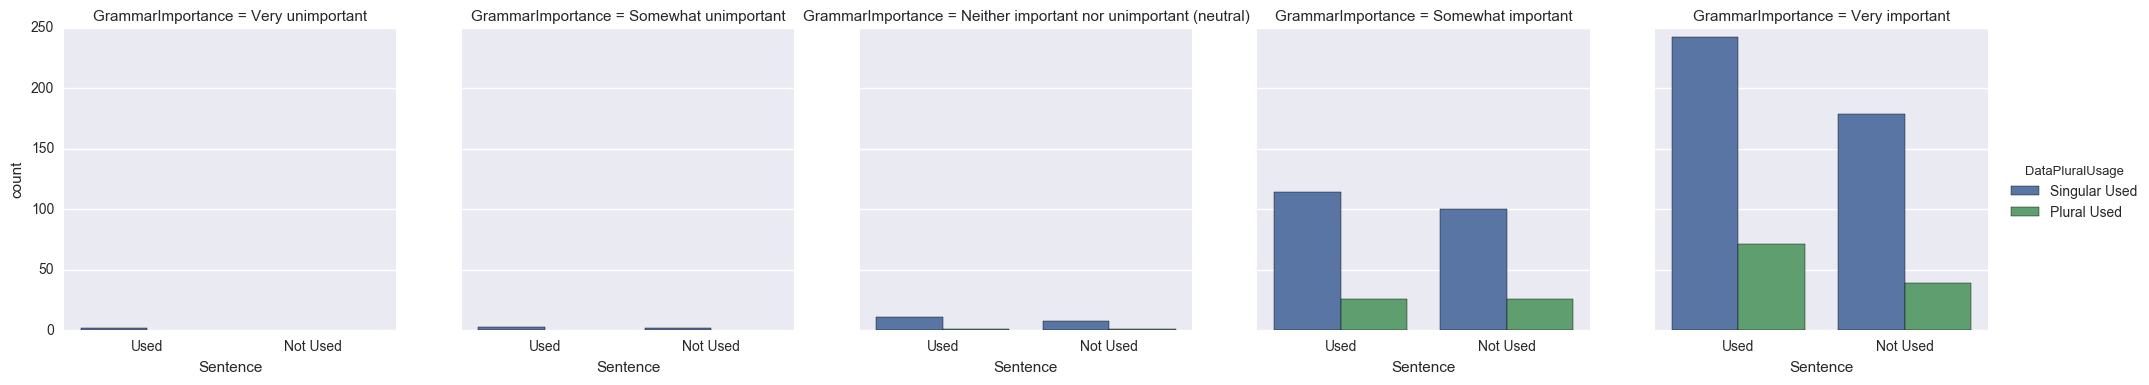

In [55]:
comparison_graph_comma('Sentence','GrammarImportance', 'DataPluralUsage', 5)